# Importing Libraries and Datasets

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("D:/Datasets/diamonds/diamonds.csv",index_col=0)

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [4]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
#df1=df.drop(["Unnamed: 0"],axis=1,inplace=False)
#df1


In [6]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
df["cut"].astype('category').value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [8]:
for col in df:
    print(df[col].astype('category').value_counts())

0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
2.70       1
2.67       1
2.65       1
2.59       1
5.01       1
Name: carat, Length: 273, dtype: int64
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
70.0       1
69.9       1
69.4       1
69.2       1
54.6       1
Name: depth, Length: 184, dtype: int64
56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
64.3       1
65.4       1
71.0       1
76.0       1
43.0       1
Name: table, Length: 127, dtype: int64
605      132
802      127
625      126
828      125
776      124
        ... 
10006      1
3

In [9]:
cut=df['cut']
cut=cut[:1000]
print(type(cut))
cut.shape

<class 'pandas.core.series.Series'>


(1000,)

In [10]:
df2=df.loc[0:1000, df.dtypes!='object']
df1=df2

In [11]:
df2.shape

(1000, 7)

In [12]:
dummy = pd.get_dummies(df[['cut','clarity']],drop_first=True)

In [13]:
dummy

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0,1,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
53936,0,1,0,0,0,1,0,0,0,0,0
53937,1,0,0,0,0,1,0,0,0,0,0
53938,0,0,0,1,0,1,0,0,0,0,0
53939,0,0,1,0,0,0,1,0,0,0,0


In [14]:
df["price"].value_counts()

605      132
802      127
625      126
828      125
776      124
        ... 
13550      1
13014      1
6811       1
5354       1
11600      1
Name: price, Length: 11602, dtype: int64

# Data Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [16]:
std_data=StandardScaler().fit_transform(df2)
type(df2)

pandas.core.frame.DataFrame

In [17]:
model = TSNE(n_components = 2, random_state = 0 , perplexity = 100 , n_iter = 1000)

In [19]:
tsne_data = model.fit_transform(std_data)

C:\Users\aryan\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


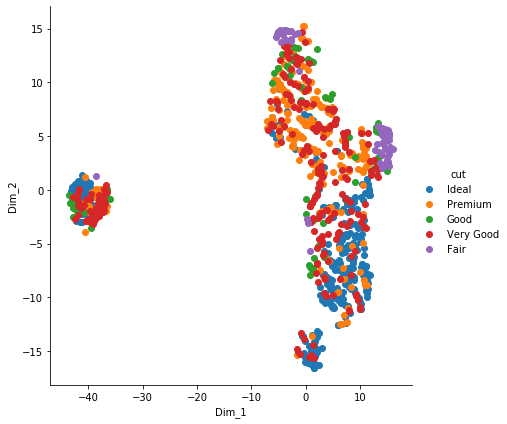

In [20]:
tsne_data = np.vstack((tsne_data.T, cut)).T
tsne_df =pd.DataFrame(data=tsne_data,columns=['Dim_1','Dim_2','cut'])
sns.FacetGrid(tsne_df,hue='cut',size=6)\
   .map(plt.scatter,'Dim_1','Dim_2')\
   .add_legend()
plt.show()

# Data Visualization

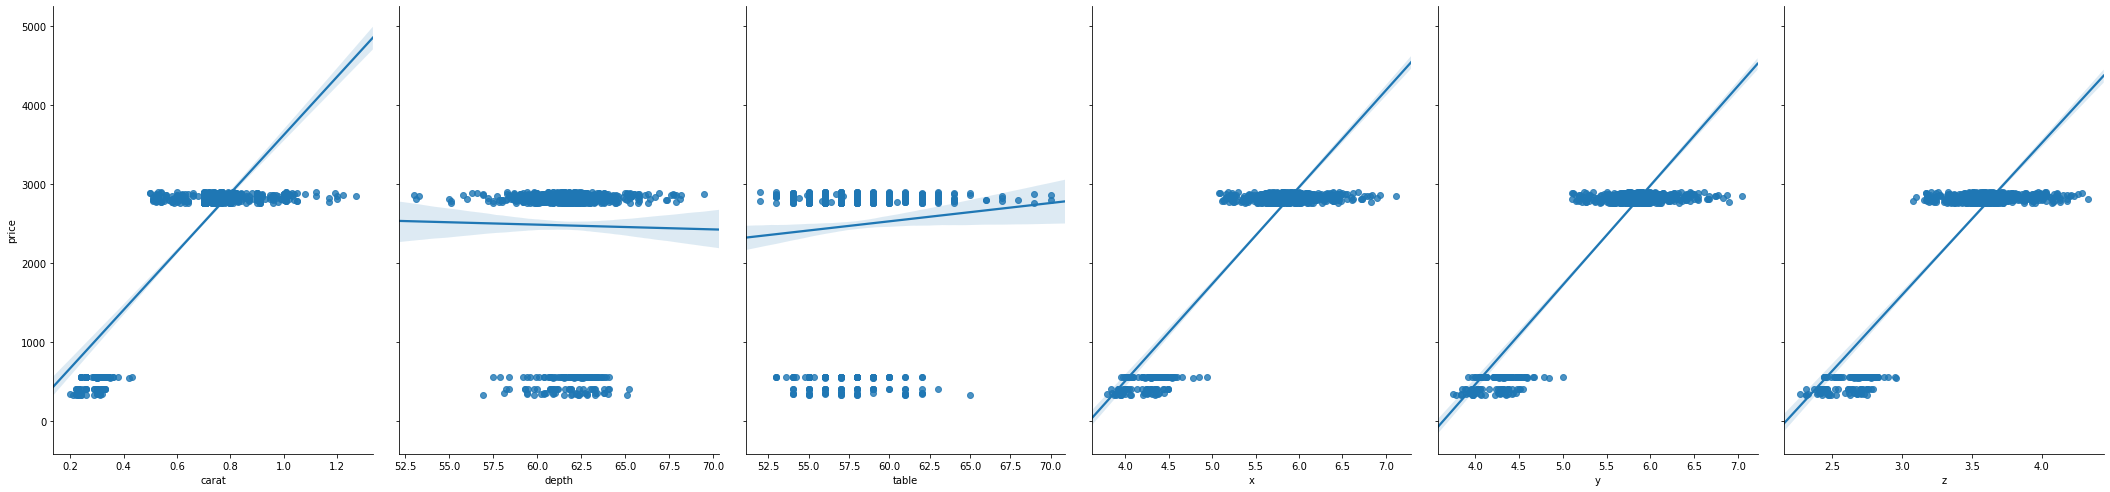

In [18]:
sns.pairplot(df1, x_vars=['carat', 'depth', 'table','x','y','z'], y_vars='price', height=7, aspect=0.7, kind='reg');

In [19]:
df1.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.095289,0.126982,0.857558,0.977595,0.972580,0.980886
depth,0.095289,1.000000,-0.344723,-0.012583,-0.050331,-0.058411,0.211345
table,0.126982,-0.344723,1.000000,0.068059,0.132682,0.112755,0.031740
price,0.857558,-0.012583,0.068059,1.000000,0.911142,0.917202,0.892919
x,0.977595,-0.050331,0.132682,0.911142,1.000000,0.996223,0.964225
y,0.972580,-0.058411,0.112755,0.917202,0.996223,1.000000,0.961984
z,0.980886,0.211345,0.031740,0.892919,0.964225,0.961984,1.000000


In [20]:
df1.carat.corr(df1.price)

0.8575577596760063

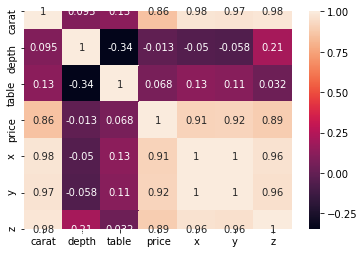

In [21]:
sns.heatmap( df1.corr(), annot=True );

In [22]:
y=df1['price']

# Building Models and Evaluating

In [23]:
x=df1[['carat']]
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(x, y)
y_pred=linreg.predict(x)
print("R^2: ", r2_score(y, y_pred))

R^2:  0.7354053111805305


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size=0.2)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [26]:
print(linreg.intercept_)
print(linreg.coef_)

-117.50844640375044
[3756.85257181]


In [27]:
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2: ", r2_score(y_test, y_pred))

457.92876040722166
R^2:  0.669340795593268


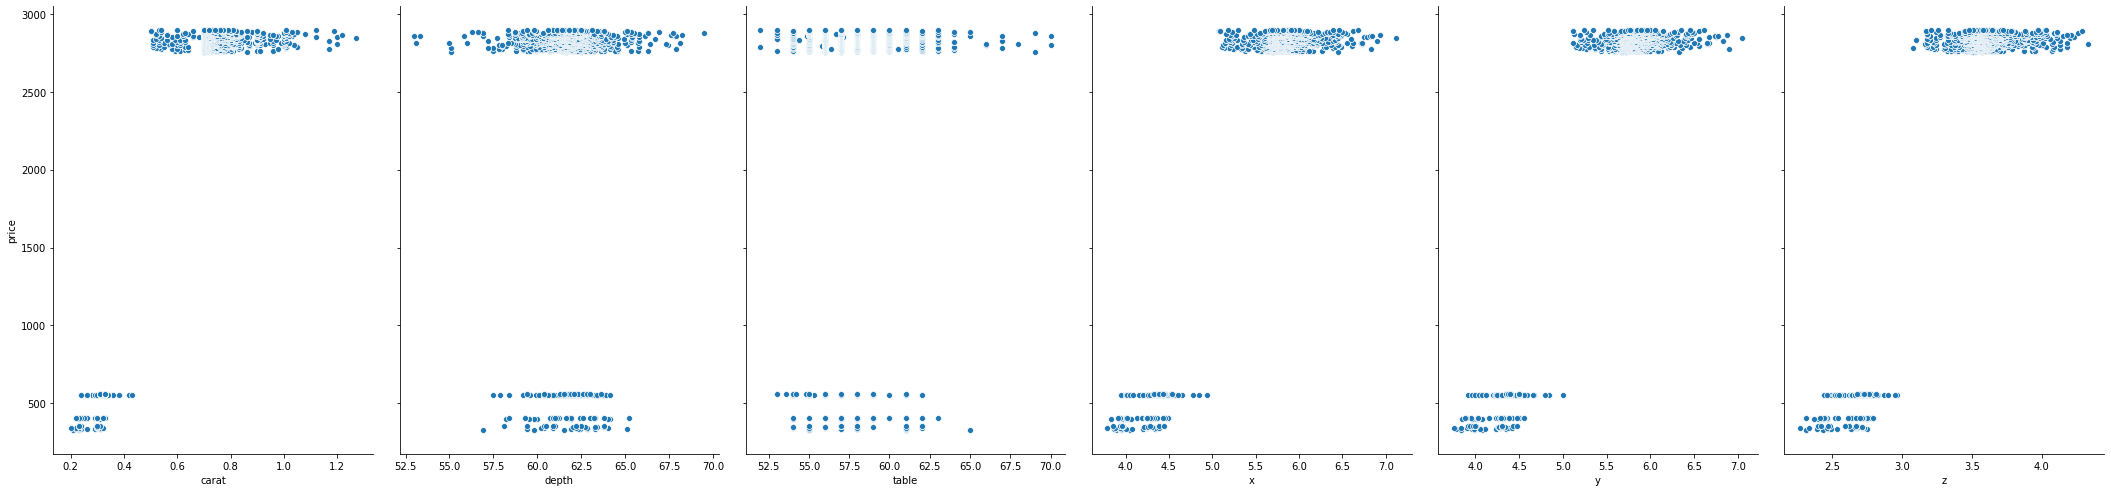

In [28]:
sns.pairplot(df1, x_vars=['carat', 'depth', 'table','x','y','z'], y_vars='price', height=7, aspect=0.7);

In [29]:
features=df1[['carat','depth','table','x','y','z']]

In [30]:
x1=features
x1

,carat,depth,table,x,y,z
1,0.23,61.5,55.0,3.95,3.98,2.43
2,0.21,59.8,61.0,3.89,3.84,2.31
3,0.23,56.9,65.0,4.05,4.07,2.31
4,0.29,62.4,58.0,4.20,4.23,2.63
5,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
996,0.54,61.4,52.0,5.30,5.34,3.26
997,0.72,62.5,55.0,5.69,5.74,3.57
998,0.72,59.4,61.0,5.82,5.89,3.48
999,0.74,61.8,58.0,5.81,5.77,3.58


In [31]:
linreg.fit(x1,y)
print(linreg.intercept_)
print(linreg.coef_)

-5756.8722227715125
[-7958.10599435  -141.27933125    28.22910188    -9.40528545
   516.39385059  5197.48955088]


In [32]:
from sklearn.metrics import r2_score
lm2 = LinearRegression().fit(x1[['carat','depth','table','x','y','z']], y)
lm2_preds = lm2.predict(x1[['carat','depth','table','x','y','z']])

print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.9156096615366172


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y, random_state=1,test_size=0.2)

In [34]:
lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 269.16510832741443
R^2:  0.885758920178059


In [35]:
z=list(zip(lm4_preds,y_test))

In [36]:
z[0:5]

[(2706.7387004754737, 2822),
 (2755.9957743435207, 2863),
 (2992.2507852189474, 2817),
 (2702.0855551699487, 2808),
 (2607.7592185230505, 2788)]

In [37]:
z1=pd.DataFrame(z,columns=['actual','predicted'])

In [38]:
type(z1)

pandas.core.frame.DataFrame

In [39]:
z1.corr()

,actual,predicted
actual,1.000000,0.941496
predicted,0.941496,1.000000


In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [42]:
nb1=GaussianNB()
predic1=nb1.fit(X_train,y_train).predict(X_test)

In [43]:
r2_score(predic1,y_test)

0.9933266848880641

In [44]:
predic1

array([2874, 2768, 2839, 2827, 2873, 2879, 2780, 2891, 2831,  554, 2833,
       2827, 2887, 2827, 2760, 2837, 2816,  402, 2839, 2891, 2760, 2875,
       2767, 2837, 2859, 2799, 2799, 2770, 2799, 2799, 2891, 2825,  557,
       2780,  552, 2780,  402,  554, 2893, 2827, 2839, 2780, 2887, 2893,
       2784, 2772, 2762,  555, 2764, 2802, 2855,  326, 2834,  402, 2767,
       2833, 2825, 2784, 2762, 2825, 2813, 2762,  557,  557, 2835, 2792,
       2874, 2839, 2782,  351, 2780, 2784, 2875, 2792, 2891,  554, 2837,
       2894, 2891, 2770, 2875,  557, 2873, 2770, 2830, 2781, 2839, 2793,
       2813, 2874, 2809, 2764, 2760, 2760,  555, 2807, 2770, 2839, 2834,
       2760, 2773,  557, 2894, 2768, 2873, 2830, 2767, 2878, 2799, 2878,
       2770, 2833, 2830,  351, 2767, 2823, 2760, 2873, 2891, 2834, 2830,
       2762,  554, 2767, 2895, 2804, 2839,  557, 2799, 2873, 2825, 2894,
       2774,  353, 2839, 2873, 2839, 2855, 2877, 2762,  405, 2891, 2859,
       2825, 2779, 2767, 2764, 2834, 2825, 2882, 27

In [45]:
y_test

508    2822
819    2863
453    2817
369    2808
243    2788
       ... 
431    2814
875    2872
551    2830
609    2839
208    2778
Name: price, Length: 200, dtype: int64

In [46]:
print(confusion_matrix(y_test,predic1))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
print(metrics.classification_report(y_test,predic1))

              precision    recall  f1-score   support

         326       0.00      0.00      0.00         0
         327       0.00      0.00      0.00         1
         334       0.00      0.00      0.00         1
         336       0.00      0.00      0.00         1
         337       0.00      0.00      0.00         1
         344       0.00      0.00      0.00         1
         351       0.50      1.00      0.67         1
         353       0.00      0.00      0.00         0
         357       0.00      0.00      0.00         0
         402       0.25      0.50      0.33         2
         403       0.00      0.00      0.00         1
         404       0.00      0.00      0.00         2
         405       0.00      0.00      0.00         2
         552       0.00      0.00      0.00         0
         553       0.00      0.00      0.00         1
         554       0.00      0.00      0.00         6
         555       0.50      1.00      0.67         1
         556       0.00    

C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aryan\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
import sklearn
np.sqrt(sklearn.metrics.mean_squared_error(y_test,predic1))

64.96133465377693

# XGBoost and SVM

In [50]:
from sklearn import svm

In [51]:
clfr=svm.SVR(kernel='linear')

In [55]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [52]:
clfr.fit(X_train,y_train)

SVR(kernel='linear')

In [53]:
predic2=clfr.predict(X_test)

In [54]:
import sklearn
np.sqrt(sklearn.metrics.mean_squared_error(y_test,predic2))

712.3197081264227

In [64]:
import xgboost as xgb

In [65]:
xgb_model=xgb.XGBRegressor().fit(X_train,y_train)
predictions=xgb_model.predict(X_test)
actuals=y_test
print(r2_score(actuals,predictions))
print(mean_squared_error(actuals,predictions))

0.9955960133115748
2792.9375306833394
